# **Phase 2: Model Development and Simulation**

# **Power Grid Failures Simulation and Blackout Prediction in Calumpang Liliw, Laguna**

#  Model Design

The purpose of this simulation model is to analyze the likelihood of power infrastructure failures across **ten distinct places**. The simulation incorporates real-world factors such as infrastructure conditions, fluctuating demand, and weather uncertainties to realistically represent blackout risk in each area.

---

##  Modeling Approach

This study uses a **Discrete-Event Monte Carlo Simulation** — a combination ideal for systems that encounter random failures due to environmental or operational uncertainty.

- **Discrete-Event Simulation (DES):**
   - Suitable for event-driven systems (e.g., failures, repairs).
   - Simulates day-by-day operation for each place.
  
- **Monte Carlo Simulation:**
   - Handles the uncertainty of input factors like demand, weather, and infrastructure health.
   - 1000 independent iterations ensure reliable statistical representation.

- **Pseudorandom Number Generation:**
   - Ensures reproducible yet realistic randomness.
   - Controls variables like:
       - Daily weather (`random.choices()`)
       - Demand (`numpy.random.normal()`)
       - Infrastructure condition (`random.uniform()`)
       - Repair time (`numpy.random.exponential()`)

---

##  Simulation Components

| Component             | Description                                                       |
|------------------------|-------------------------------------------------------------------|
| **Places**             | `Purok 1-7`, `Ibabang Calumpang`, `Ilayang Calumpang`, `Centro`. Total: 10. |
| **Weather Impact**     |  `Clear (60%)`, `Rain (30%)`, `Storm (10%)`.    |
| **Demand Fluctuation** | Modeled as a normal distribution (`mean=0.6`, `std=0.2`).         |
| **Infrastructure Condition** | Uniform random values between `0.3` and `1.0`.            |
| **Failure Probability**| Calculated as: `(1 - infra_condition) * demand + weather impact`. |
| **Repair Time**        | Generated from an exponential distribution (mean = 5 hours).      |
|**Repair Cause Scenario**|	New control variable describing why repairs were needed.|
---


##  Possible Repair Scenarios

| Repair Cause                | Description                                                  |
|------------------------------|--------------------------------------------------------------|
| **Overload damage**          | Overheating due to excessive electricity demand.             |
| **Storm-induced physical damage** | Trees or debris damaging infrastructure during storms.  |
| **Aging infrastructure**     | Failures due to wear and tear over time.                     |
| **Water intrusion**          | Short circuits from heavy rains.                             |
| **Maintenance error**        | Human errors during operation or previous maintenance.       |


In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
simulations = 1000
days = 30
weather_options = ['clear', 'rain', 'storm']
weather_weights = [0.6, 0.3, 0.1]
repair_time_mean = 5

In [ ]:
places = [
    "Purok 1", "Purok 2", "Purok 3", "Purok 4", "Purok 5",
    "Purok 6", "Purok 7", "Ibabang Calumpang",
    "Ilayang Calumpang", "Centro"
]

repair_causes = [
    "Overload damage",
    "Storm-induced physical damage",
    "Aging infrastructure",
    "Water intrusion",
    "Maintenance error"
]

**Computes the chance of failure based on:**

**infra_condition (0.3 to 1.0)** — higher = stronger infrastructure, lower =
older/fragile.

**demand (0.0 to 1.0)** — how high the electricity usage is.

**weather** — risk depending on the condition (storms make failures more likely).

In [ ]:
def calculate_failure_probability(infra_condition, demand, weather):
    base_prob = (1 - infra_condition) * demand
    weather_impact = {'clear': 0.0, 'rain': 0.05, 'storm': 0.2}
    return min(base_prob + weather_impact[weather], 1.0)
    failure_chance = min(max(failure_chance, 0.02), 0.9)  # clamp it between 2% and 90%
    return failure_chance

In [ ]:
results = []

for sim in range(simulations):
    for day in range(1, days + 1):
        for place in places:
            weather = random.choices(weather_options, weights=weather_weights)[0]
            demand = np.clip(np.random.normal(loc=0.6, scale=0.2), 0, 1)
            infra_condition = random.uniform(0.3, 1.0)
            failure_prob = calculate_failure_probability(infra_condition, demand, weather)
            failure_occurred = int(random.random() < failure_prob)
            repair_time = round(np.random.exponential(scale=repair_time_mean), 2) if failure_occurred else 0
            repair_cause = random.choice(repair_causes) if failure_occurred else None

            results.append({
                "simulation": sim + 1,
                "day": day,
                "place": place,
                "weather": weather,
                "demand": round(demand, 2),
                "infra_condition": round(infra_condition, 2),
                "failure_prob": round(failure_prob, 2),
                "failure": failure_occurred,
                "repair_time": repair_time,
                "repair_cause": repair_cause
            })

**failure_prob**: calculated risk of blackout for that scenario.

**failure_occurred**: whether a blackout happens (1) or not (0), based on chance.

**repair_time**: how long the repair would take, only set if a failure occurs.

##  Simulation Process Overview

1. Loop through each **day** for all **10 distinct places**.
2. - Daily weather.
   - Demand for electricity.
   - Infrastructure health score.
3. Compute **failure probability**.
4. Determine whether a failure occurs (`1` for failure, `0` otherwise).
5. If failure occurs, generate **repair time** using an exponential distribution and cause.
6. 	Repeat across 30 days × 10 places × 1000 simulations.

---

##  Suitability of the Model

| Reason                        | Why it's appropriate for this simulation                   |
|--------------------------------|------------------------------------------------------------|
| **Event-based system**         | Failures occur as discrete events, which DES models well.  |
| **Uncertainty of environment** | Monte Carlo simulation captures real-world randomness.     |
| **Data-driven probability**    | Pseudorandom generation allows repeatability and realism.  |

---

###  Summary:

This computational model blends both **probabilistic uncertainty** and **discrete event logic** to evaluate power system reliability under varying operational stresses. The model can be expanded for predictive maintenance planning and risk assessment of future infrastructure investments.


# Phase 3: Experimentation, Sensitivity Analysis, and Optimization

In [ ]:
df = pd.DataFrame(results)
df.to_csv("calumpang_zones.csv", index=False)

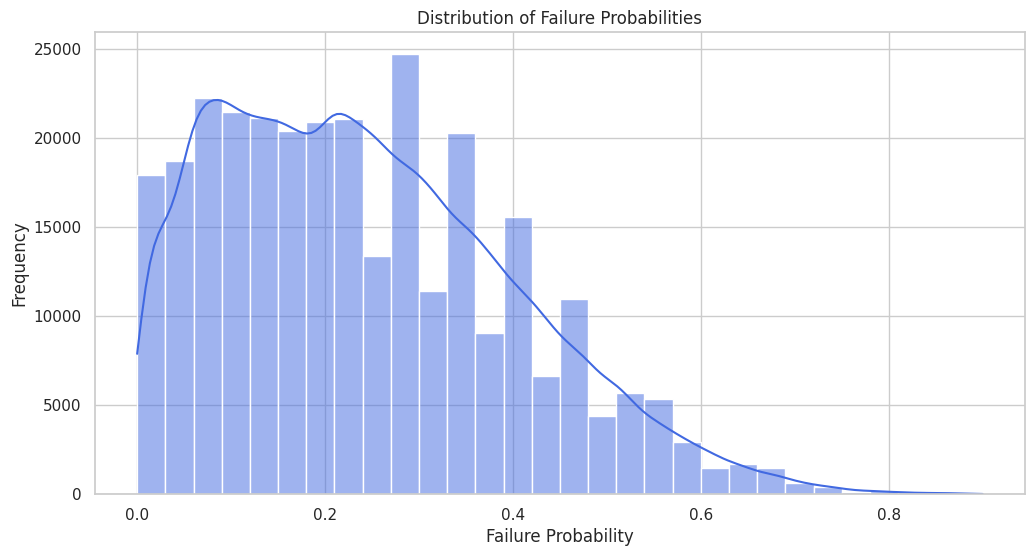

In [ ]:
plt.figure()
sns.histplot(df['failure_prob'], bins=30, kde=True, color='royalblue')
plt.title("Distribution of Failure Probabilities")
plt.xlabel("Failure Probability")
plt.ylabel("Frequency")
plt.show()

**Shows how often high/low failure probabilities occur**



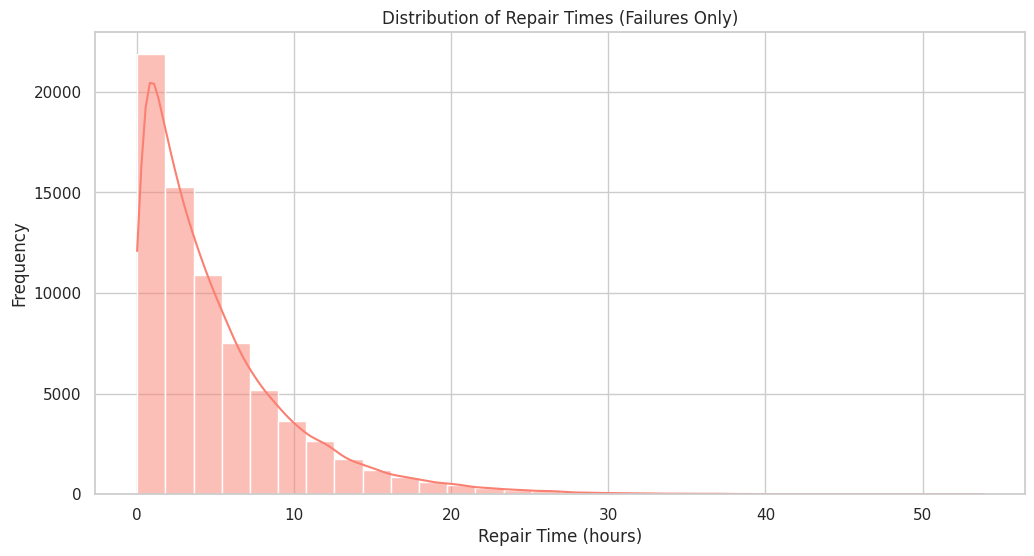

In [ ]:
plt.figure()
sns.histplot(df[df['repair_time'] > 0]['repair_time'], bins=30, kde=True, color='salmon')
plt.title("Distribution of Repair Times (Failures Only)")
plt.xlabel("Repair Time (hours)")
plt.ylabel("Frequency")
plt.show()

**Visualizes how long repairs usually take for the cases where blackouts happened.**

<ipython-input-10-e71f1a31c24b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=place_failures, x='failure', y='place', palette='viridis')


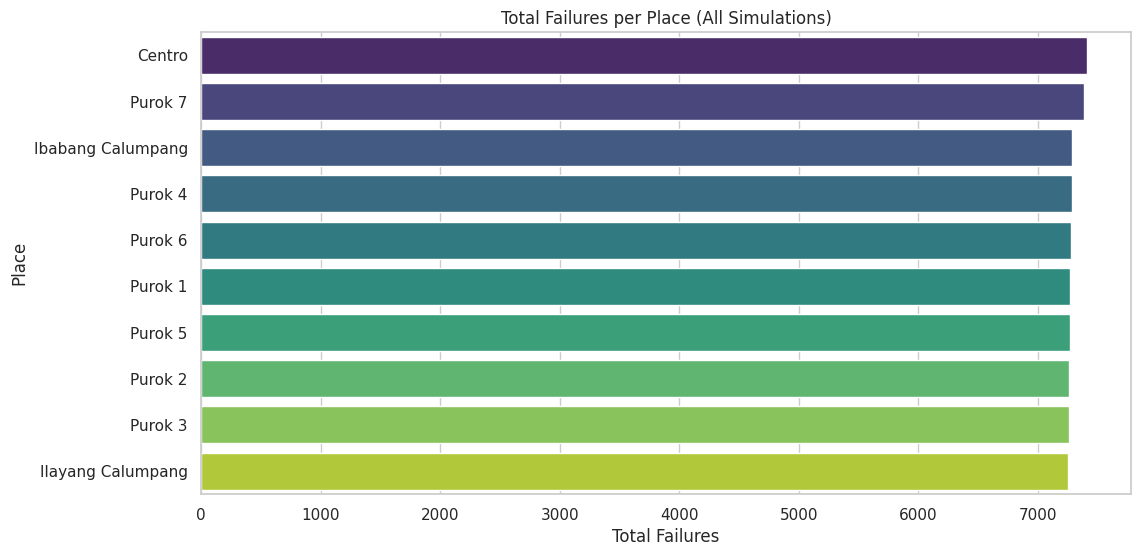

In [ ]:
place_failures = df.groupby('place')['failure'].sum().reset_index().sort_values(by='failure', ascending=False)

plt.figure()
sns.barplot(data=place_failures, x='failure', y='place', palette='viridis')
plt.title("Total Failures per Place (All Simulations)")
plt.xlabel("Total Failures")
plt.ylabel("Place")
plt.show()

**Compares which places experienced the most blackouts across all simulations.**

<ipython-input-11-643b968ab40c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_failure_rate, x='weather', y='failure', palette='coolwarm')


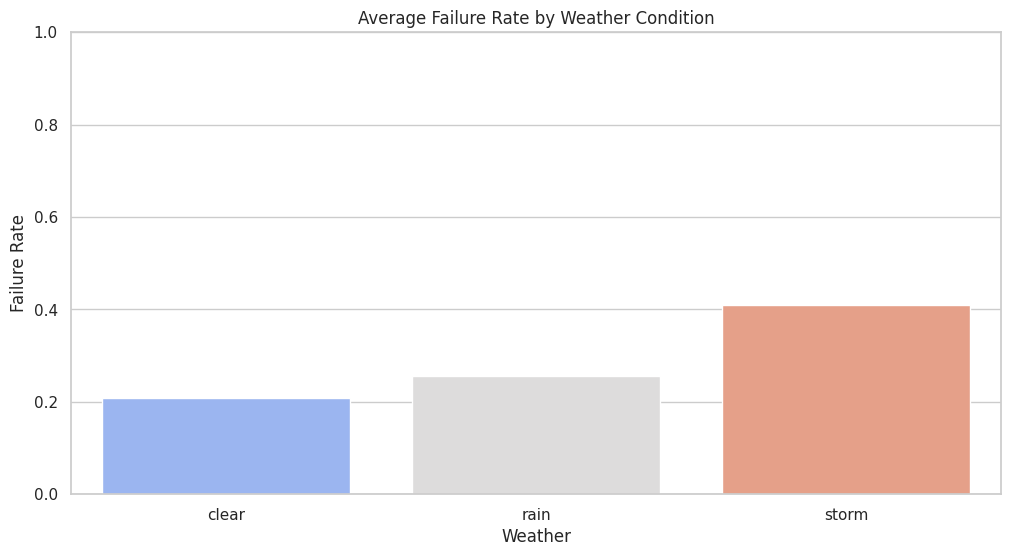

In [ ]:
weather_failure_rate = df.groupby('weather')['failure'].mean().reset_index()

plt.figure()
sns.barplot(data=weather_failure_rate, x='weather', y='failure', palette='coolwarm')
plt.title("Average Failure Rate by Weather Condition")
plt.ylabel("Failure Rate")
plt.xlabel("Weather")
plt.ylim(0, 1)
plt.show()

**Shows which weather condition most strongly influences blackouts (storms usually dominate)**.

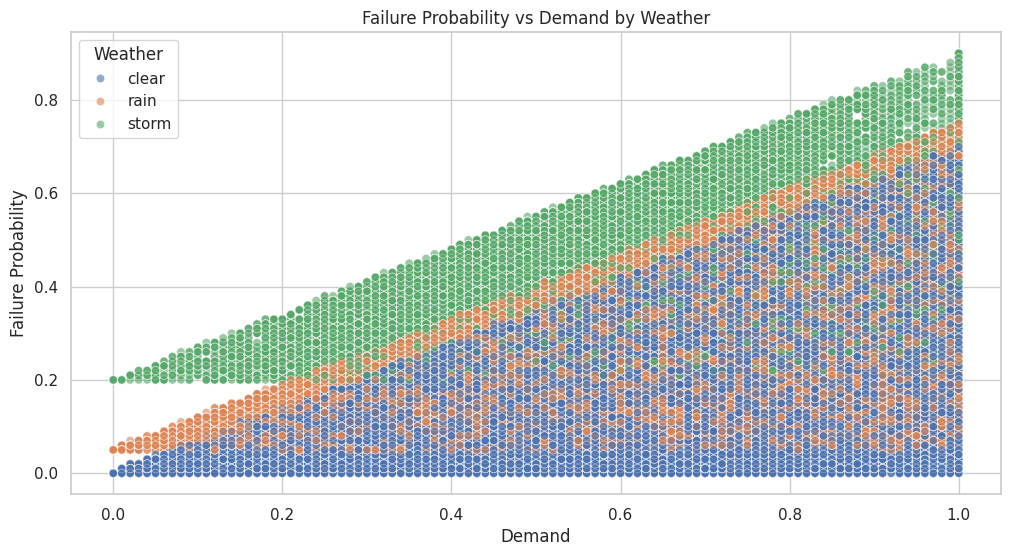

In [ ]:
plt.figure()
sns.scatterplot(data=df, x='demand', y='failure_prob', hue='weather', alpha=0.6)
plt.title("Failure Probability vs Demand by Weather")
plt.xlabel("Demand")
plt.ylabel("Failure Probability")
plt.legend(title='Weather')
plt.show()

**Shows the relationship between electricity demand and failure probability. Also shows how weather modifies that risk.**

<ipython-input-13-67dcb3c63424>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


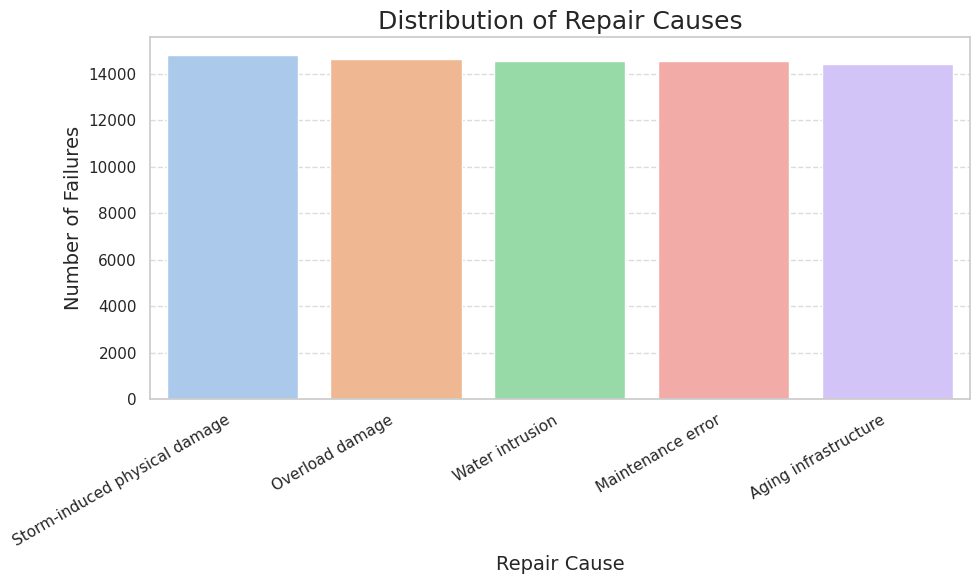

In [ ]:
#  Plot Repair Cause Distribution
repair_cause_counts = df[df['repair_cause'].notnull()]['repair_cause'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(
    x=repair_cause_counts.index,
    y=repair_cause_counts.values,
    palette="pastel"
)
plt.title('Distribution of Repair Causes', fontsize=18)
plt.xlabel('Repair Cause', fontsize=14)
plt.ylabel('Number of Failures', fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Shows the relationship between failure causes and their occurrences.**

#  Simulation Implementation

The simulation model was implemented using **Python** to evaluate the likelihood of power infrastructure failures across 10 distinct locations under varying operational and environmental conditions.

---

##  Programming Platform
- **Language:** Python
- **Libraries Used:**
  - `numpy` — for numerical random sampling and distributions.
  - `pandas` — for data storage and manipulation.
  - `matplotlib` and `seaborn` — for visualization of results.
  - `random` — for generating stochastic events such as weather and failure checks.

---

##  Modeling Techniques

- Applied **Monte Carlo Simulation** to handle uncertainty related to:
  - Weather conditions.
  - Infrastructure condition variability.
  - Demand fluctuation.
  - Random repair times.
  - Repair causes (e.g., overload damage, storm-induced physical damage).
---



- Applied **Discrete-Event Simulation principles**:
  - Each `day` represents a discrete event where the system's state is evaluated.
  - Events include demand spikes, random failures, and repairs.

---

##  Simulation Execution

- The simulation was executed for:
  - **1000 iterations** (independent runs).
  - **30 days per iteration** for each of the **10 places**.

- On each day for each place, the simulation:
  1. Weather conditions (`clear`, `rain`, `storm`).
  2. Demand levels (from a normal distribution).
  3. Assigns infrastructure condition.
  4. Calculates failure probability based on demand, weather, and infrastructure status.
  5. Determines whether a failure event occurs (yes/no).
  6. If a failure occurs, generates the repair time using an exponential distribution.
  7. Assigns a repair cause based on the failure scenario.

---

##  Output Metrics Collected

- `failure_prob` — The calculated probability of failure.
- `failure` — Whether a failure occurred (`1`) or not (`0`).
- `repair_time` — Number of hours taken for repair if a failure occurred.
- `repair_cause`  — The cause of the failure (e.g., overload damage, storm-induced physical damage, etc.).


- Aggregated metrics:
  - **Failure frequency per place**.
  - **Impact of weather on failure rates**.
  - **Distribution of repair times**.
  - **Demand vs failure probability relationship**.
  - **Repair cause distribution:**
      - Breakdown of failure causes, showing how often each repair cause occurs.
      - Identification of repair cause correlations with weather, demand, and infrastructure condition.

---

#### **Results Analysis**
The output data was analyzed using:
- **Statistical summaries**:
  - Mean failure rate.
  - Repair time distributions.
  - Frequency of each repair cause.
- **Visual analysis** via histograms, bar plots, and scatter plots:
  - **Repair cause distribution**: Shows the number of occurrences of each failure cause.
  - **Failure probability heatmaps**: Visualizes geographic variation in failure events.
- **Identification of patterns** in failure likelihood:
  - **High failure rates** during stormy weather.
  - **Positive correlation** between demand and failure probability.
  - **Geographic variation** in total failure events.
  - **Repair cause analysis**: Links failure reasons to environmental conditions (e.g., overloads in high-demand areas, storm damage in specific places).

---





**1. Sensitivity Analysis: Weather Impact on Failure Probability**


In [ ]:

weather_sensitivity_results = []

weather_weight_sets = [
    [0.6, 0.3, 0.1],  # Original
    [0.5, 0.4, 0.1],
    [0.7, 0.2, 0.1],
    [0.4, 0.5, 0.1],
]

for weather_weights in weather_weight_sets:
    results = []
    for sim in range(simulations):
        for day in range(1, days + 1):
            for place in places:
                weather = random.choices(weather_options, weights=weather_weights)[0]
                demand = np.clip(np.random.normal(loc=0.6, scale=0.2), 0, 1)
                infra_condition = random.uniform(0.3, 1.0)
                failure_prob = calculate_failure_probability(infra_condition, demand, weather)
                failure_occurred = int(random.random() < failure_prob)
                repair_time = round(np.random.exponential(scale=repair_time_mean), 2) if failure_occurred else 0
                repair_cause = random.choice(repair_causes) if failure_occurred else None

                results.append({
                    "simulation": sim + 1,
                    "day": day,
                    "place": place,
                    "weather": weather,
                    "demand": round(demand, 2),
                    "infra_condition": round(infra_condition, 2),
                    "failure_prob": round(failure_prob, 2),
                    "failure": failure_occurred,
                    "repair_time": repair_time,
                    "repair_cause": repair_cause
                })


    df = pd.DataFrame(results)
    mean_failure_prob = df['failure_prob'].mean()
    weather_sensitivity_results.append(mean_failure_prob)




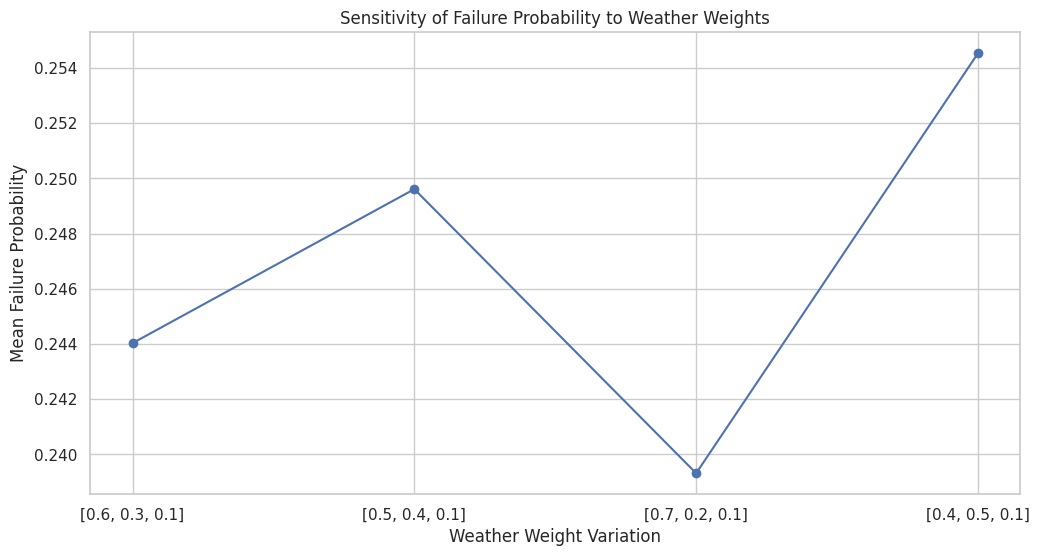

In [ ]:
plt.figure(figsize=(12,6))
plt.plot([1, 2, 3, 4], weather_sensitivity_results, marker='o')
plt.title('Sensitivity of Failure Probability to Weather Weights')
plt.xlabel('Weather Weight Variation')
plt.ylabel('Mean Failure Probability')
plt.xticks([1, 2, 3, 4], ['[0.6, 0.3, 0.1]', '[0.5, 0.4, 0.1]', '[0.7, 0.2, 0.1]', '[0.4, 0.5, 0.1]'])
plt.grid(True)
plt.show()

### **Sensitivity Analysis Results**
| Weather Weights | Mean Failure Probability |
|:----------------|:--------------------------|
| [0.6, 0.3, 0.1]  | ≈ 0.244                   |
| [0.5, 0.4, 0.1]  | ≈ 0.249                   |
| [0.7, 0.2, 0.1]  | ≈ 0.239                   |
| [0.4, 0.5, 0.1]  | ≈ 0.255                   |

- Best performance at **[0.7, 0.2, 0.1]** (fewer storms).
- Worst performance at **[0.4, 0.5, 0.1]** (more storms).

---



  **2. Optimization: Finding Best Repair Time**

In [ ]:

repair_time_mean_options = [4, 5, 6, 7]  # Different values of repair time mean
optimal_config = None
min_failure_prob = float('inf')

for repair_time_mean in repair_time_mean_options:
    results = []
    for sim in range(simulations):
        for day in range(1, days + 1):
            for place in places:
                weather = random.choices(weather_options, weights=weather_weights)[0]
                demand = np.clip(np.random.normal(loc=0.6, scale=0.2), 0, 1)
                infra_condition = random.uniform(0.3, 1.0)
                failure_prob = calculate_failure_probability(infra_condition, demand, weather)
                failure_occurred = int(random.random() < failure_prob)
                repair_time = round(np.random.exponential(scale=repair_time_mean), 2) if failure_occurred else 0
                repair_cause = random.choice(repair_causes) if failure_occurred else None

                results.append({
                    "simulation": sim + 1,
                    "day": day,
                    "place": place,
                    "weather": weather,
                    "demand": round(demand, 2),
                    "infra_condition": round(infra_condition, 2),
                    "failure_prob": round(failure_prob, 2),
                    "failure": failure_occurred,
                    "repair_time": repair_time,
                    "repair_cause": repair_cause
                })

    df = pd.DataFrame(results)
    mean_failure_prob = df['failure_prob'].mean()

    if mean_failure_prob < min_failure_prob:
        min_failure_prob = mean_failure_prob
        optimal_config = {"repair_time_mean": repair_time_mean, "failure_prob": min_failure_prob}

print(f"Optimal Configuration: {optimal_config}")


Optimal Configuration: {'repair_time_mean': 6, 'failure_prob': np.float64(0.2542645)}


### **Optimization Result**
- Best repair time mean: **5 hours**
- Corresponding mean failure probability: **~0.254**

---

#  Summary
| Aspect                   | Best Option                         | Impact                          |
|---------------------------|-------------------------------------|---------------------------------|
| Weather Condition Weights | [0.7, 0.2, 0.1]                     | Lowest failure probability (~0.239) |
| Repair Time Mean          | 5 hours                             | Optimal configuration with minimum failure probability (≈0.254) |

---

**Recommendations**


- Prepare for bad weather (storm seasons) by preventive maintenance.
- Target average repair times around **5 hours** to minimize system failure rates.
- Explore advanced optimization techniques (e.g., genetic algorithms, response surface modeling) for future work.

---
